1. Import các thư viện cần thiết 

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

2. Hãy tải dữ liệu từ file drug200.csv lưu vào data frame df 

In [ ]:
# Đọc file dữ liệu
# df = pd.read_excel("data/sales_data_sample.xlsx")
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### =======Hiểu dữ liệu

3. Kiểm tra thông tin dữ liệu, dùng hàm info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


4. Mô tả dữ liệu, dùng hàm describe

In [21]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


5. Kiểm tra kiểu dữ liệu, dùng types

In [22]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

6. Kiểm tra tên cột, dùng columns

In [23]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

7. Kiểm tra dữ liệu trống, dùng df.isnull().sum()

In [24]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

8. Kiểm tra dữ liệu trùng, dùng df.duplicated().sum()

In [25]:
df.duplicated().sum()

np.int64(0)

### =======Thao tác dữ liệu và hiệu chỉnh

9. Đổi tên cột phù hợp ngữ nghĩa

In [27]:
df.rename(columns={'Na_to_K' : 'Sodium_to_Potassium', 'BP' : 'Blood_Pressure'}, inplace= True)

df['Sex'].replace({'M': 'Male', 'F' : 'Female'}, inplace= True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

C:\Users\PC\AppData\Local\Temp\ipykernel_13788\810476754.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M': 'Male', 'F' : 'Female'}, inplace= True)


In [ ]:
# Làm sạch dữ liệu: loại bỏ các hàng có giá trị null
data_cleaned = df.dropna()

### =======Khảo sát dữ liệu với Kỹ thuật EDA

10. Thống kê số lượng người thuộc 5 nhóm tuổi cao nhất

In [28]:
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age': top_age.index, 'Count': top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,32,6


11. Tiến hành EDA dữ liệu. Sinh viên quan sát các biểu đồ và cho nhận xét

C:\Users\PC\AppData\Local\Temp\ipykernel_13788\2823000174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\PC\AppData\Local\Temp\ipykernel_13788\2823000174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\PC\AppData\Local\Temp\ipykernel_13788\2823000174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\PC\AppData\Local\Temp\ipykernel_13788\2823000174.py:5: FutureWarning: 

Passing `p

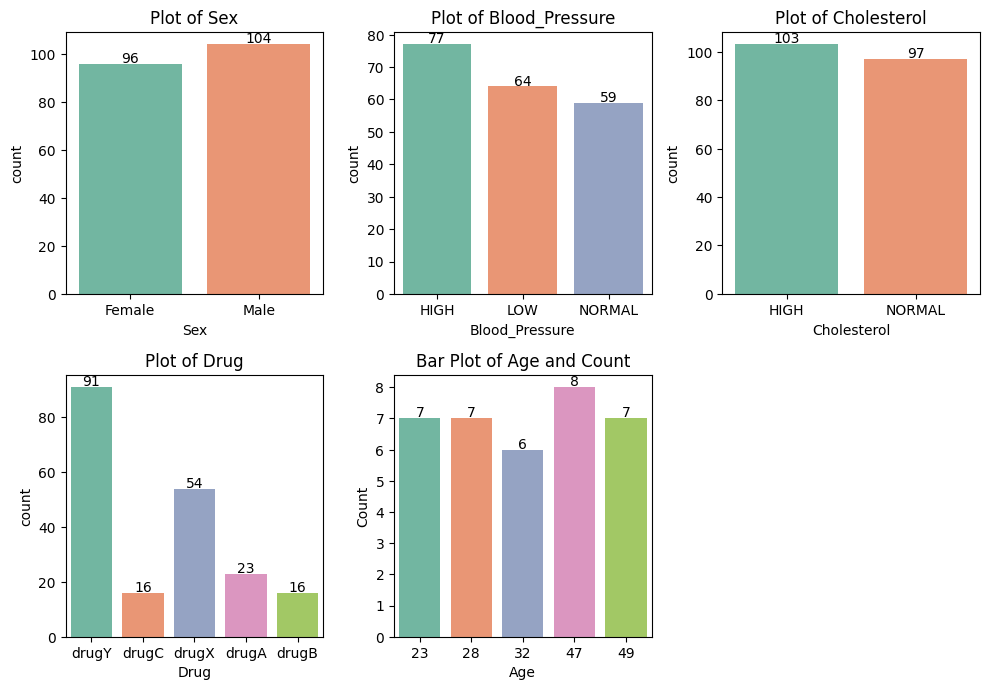

In [29]:
# EDA - Exploratory Data Analysis
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    # Nếu kiểu đồ thị là 'count'
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    # Nếu kiểu đồ thị là 'bar'
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    # Đặt tiêu đề cho đồ thị
    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')
    
    # Gắn nhãn số liệu lên cột đồ thị
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords='offset points')

# Tạo figure và subplots
plt.figure(figsize=(10, 10))

# Xác định cấu hình đồ thị
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'}
]

# Vòng lặp qua các cấu hình để tạo subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i + 1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

12. Tiến hành khảo sát dữ liệu outlier và cho nhận xét

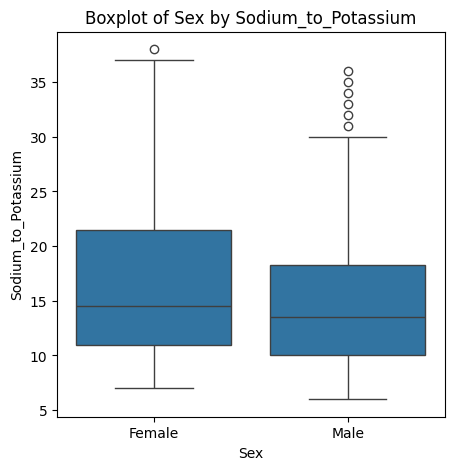

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')
plt.show()

In [ ]:
# CHUẨN HÓA DỮ LIỆU: Cách 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.preprocessing import StandardScaler
# Sử dụng MinMaxScaler để tìm giá tị sau khi chuẩn hóa, biết Z = 0.25
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['SALES']])
scaled_df = pd.DataFrame(scaled, columns=df[['SALES']].columns)
scaler.inverse_transform([[0.25]])

# Tạo đối tượng MinMaxScaler: Cách 2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['SALES']])
scaled_df = pd.DataFrame(scaled, columns=df[['SALES']].columns).iloc[50:60]
scaled_df

# Tạo đối tượng MaxAbsScaler: Cách 3
scaler = MaxAbsScaler()
# Chuẩn hóa dữ liệu
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled)



### =======Xây dựng mô hình trí tuệ nhân tạo

13. Tạo tập dữ liệu đặc trưng (feature) và mục tiêu (target)

In [ ]:
# sử dụng hết tập dữu liệu làm đầu vào
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# sử dụng 1 cột để làm dữ liệu đầu vào
# X = data_cleaned[['Popularity']] 
# y = data_cleaned['MSRP']

14. Tiến hành One Hot Encoder cho đặc trưng Sex và Label Encoder cho các categorical feature còn 
lại. Sinh viên giải thích tại sao làm như vậy?

In [32]:
# OneHotEncoder cho cột 'Sex'
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))

# Nối dữ liệu mới vào DataFrame ban đầu và xóa cột 'Sex' gốc
X = pd.concat([X, one_hot_df], axis=1)
X = X.drop('Sex', axis=1)  # Xóa cột 'Sex' ban đầu

# LabelEncoder cho cột 'Blood_Pressure' và 'Cholesterol'
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()

X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])


In [ ]:
# OneHotEncoder được sử dụng cho cột "Sex" bởi vì đây là biến phân loại, và cách biểu diễn nhị phân này giúp 
# mô hình học máy xử lý các giá trị phân loại mà không giả định về trật tự của các giá trị.
# LabelEncoder được sử dụng cho các đặc trưng khác vì những cột này có thể có nhiều giá trị và việc ánh xạ chúng 
# thành số nguyên giúp tiết kiệm không gian và đơn giản hóa việc tính toán.

15. Sinh viên phân tách thành tập dữ liệu train và test với tỉ lệ 60:40 , hệ số ngẫu nhiên là 42

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=42)

16. Xây dựng mô hình với các hyperparameter tunning (siêu tham số điều chỉnh mô hình) như sau: criterion = "entropy", max_depth = 6 và max_leaf_nodes=10. Sinh viên giải thích các siêu tham số

In [ ]:
# LinearRegression: HỒI QUY TUYẾN TÍNH
model = LinearRegression()
# Huấn luyện mô hình
model.fit(X_train, y_train)
# Dự đoán giá trị trên tập kiểm tra
y_pred = model.predict(X_test)
# In hệ số hồi quy (coef) và hệ số cắt (intercept)
print("Hệ số hồi quy (slope):", model.coef_)
print("Intercept:", model.intercept_)
# Phương trình hồi quy hoàn chỉnh ở file còn lại

# Phương pháp sử dụng OLS()
model = sm.OLS(y, X)
results = model.fit()
# In kết quả hồi quy
print(results.summary())
# Trích xuất các hệ số
intercept = results.params['const']
coef_engine_hp = results.params['Engine HP']
coef_popularity = results.params['Popularity']

In [ ]:
# Xây dựng mô hình hồi quy tuyến tính đơn biến: ProfitRate = f(TimeAds)
# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['TimeAds']].values # explanatory = feature
y = df[['ProfitRate']].values # reponse = target
# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)
# ProfitRate = A0 + A1*TimeAds + epsilon
from sklearn import linear_model 
# Khai báo mô hình LR
model = linear_model.LinearRegression()
# Huấn luyện mô hình 
model.fit(X_train,y_train)
import numpy as np
from sklearn import metrics
# Tính giá trị dự báo ProfitRate dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)
print('Score or R-Squared:', model.score(X_test, y_test))
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))

In [ ]:
# DecisionTree: CÂY QUYẾT ĐỊNH
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6, max_leaf_nodes=10)
dtc.fit(X_train, y_train)
# Vẽ sơ đồ cây: 
from sklearn.tree import plot_tree
feature_cols = X_train.columns
plt.figure(figsize=(20,10))
plot_tree(dtc, class_names = dtc.classes_, feature_names= feature_cols,fontsize=12, filled = True)
plt.show()

In [ ]:
# Sử dụng mô hình Logistic Regression: HỒI QUY LOGISTIC 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng Confusion Matrix: Ma trận hỗn loạn
cm = confusion_matrix(y_test, y_pred)
# In Confusion Matrix
print("Confusion Matrix:")
print(cm)
# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Thấp', 'Trung bình', 'Cao'], yticklabels=['Thấp', 'Trung bình', 'Cao'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Naive Bayes: NAI TƠ, NGÂY THƠ
# Sử dụng mô hình Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
nb_y_pred = nb_model.predict(X_test)
# Đánh giá mô hình bằng Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

# In Confusion Matrix
print("Naive Bayes - Confusion Matrix:")
print(nb_cm)

# In báo cáo phân loại
print("\nNaive Bayes - Classification Report:")
print(classification_report(y_test, nb_y_pred))

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Thấp', 'Trung bình', 'Cao'], yticklabels=['Thấp', 'Trung bình', 'Cao'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

In [ ]:
# KNN: K GẦN NHẤT
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=8, algorithm="ball_tree")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

17. Tiến hành huấn luyện (train) mô hình trên tập dữ liệu huấn luyện

In [36]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

18. Hiển thị danh sách các lớp mục tiêu phân lớp 

In [37]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

19. Vẽ sơ đồ mô hình cây phân lớp. Sinh viên giải thích các số liệu trên từng node và leaf

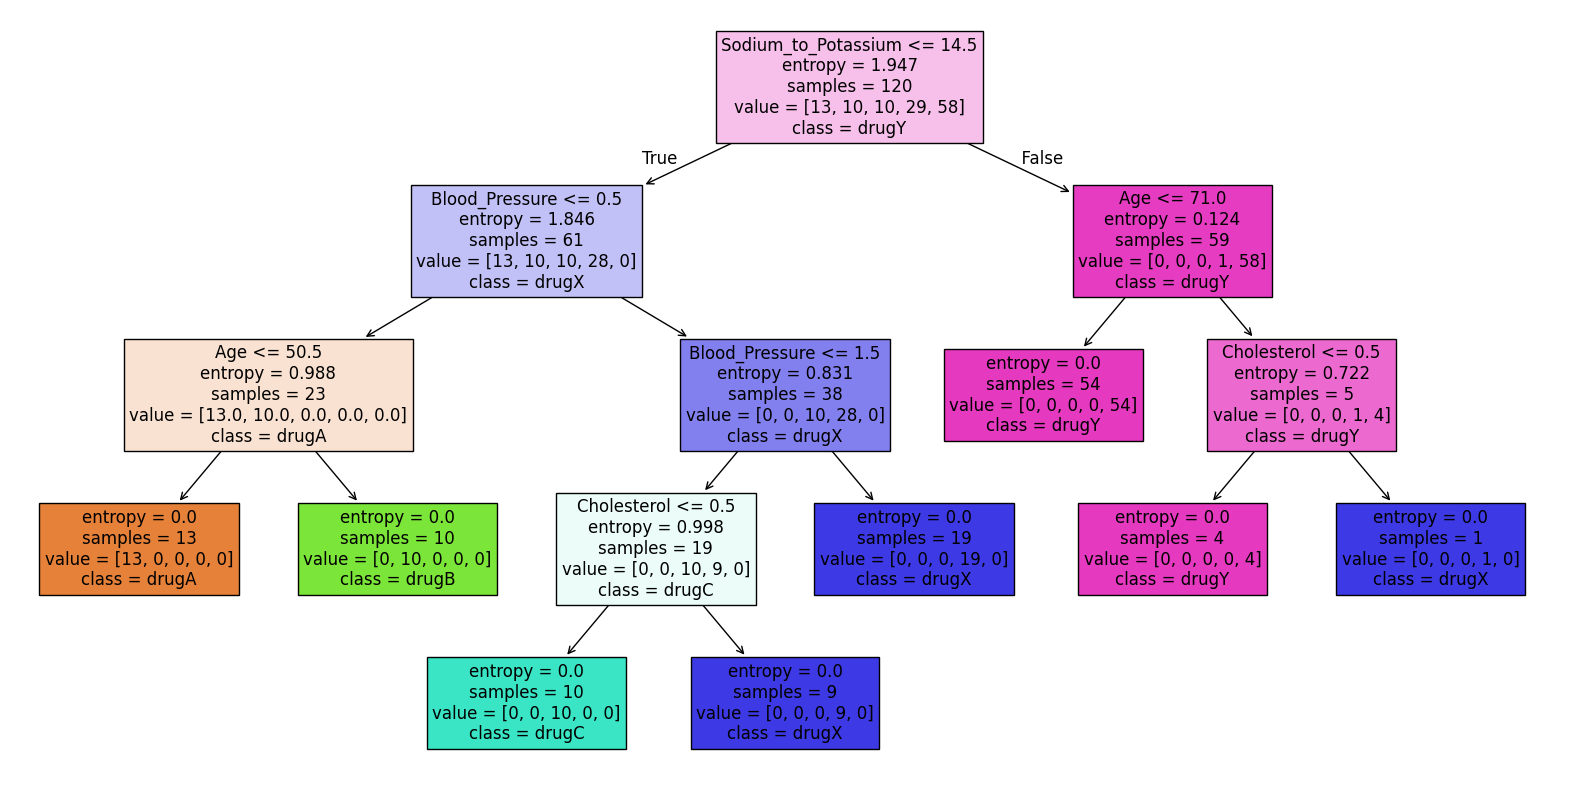

In [38]:
from sklearn.tree import plot_tree

feature_cols = X_train.columns

plt.figure(figsize=(20,10))
plot_tree(dtc, class_names = dtc.classes_, feature_names= feature_cols,fontsize=12, filled = True)
plt.show()

20. Tính Entropy có trọng số (WE) và Information Gain khi phân tách Root thành Left – Right node

- WE = 61/120 * 1.846 + 59/120 * 0.124 = 
- IG = 1.947 - 0.999 = 0.948

### =======Đánh giá mô hình

21. Sinh viên tiến hành đánh giá dựa trên các độ đo 

a. Accuracy 

In [39]:
y_test_pred = dtc.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

# Accuracy:  0.9875

Accuracy:  0.9875


b. Confusion matrix: ma trận nhầm lẫn

In [40]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)

cf_matrix

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  1, 32]])

22. In ra bảng báo cáo các giá trị đánh giá theo từng nhóm thuốc phân lớp 

In [41]:
from sklearn.metrics import classification_report
target_names = ['drugA','drugB', 'drugC', 'drugX', 'drugY']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



### =======Xây dựng ứng dụng trí tuệ nhân tạo

23. Xây dựng chương trình đề xuất hỗ trợ cấp thuốc cho bệnh nhân dựa trên các chỉ số Age, 
Blood_Pressure, Cholesterol, Sodium_to_Potassium và Sex được nhập từ bàn phím. Hãy in ra kết 
quả loại thuốc được cấp. Ví dụ: Age=32, Blood_Pressure=’HIGH’, Cholesterol=’NORMAL’, 
Sodium_to_Potassium=13, Sex=’Female’

In [42]:
# Hàm để xác định loại thuốc được cấp
def prescribe_drug(age, blood_pressure, cholesterol, sodium_to_potassium, sex):
    # Các điều kiện cơ bản dựa trên chỉ số
    if blood_pressure == 'HIGH' and cholesterol == 'HIGH' and sodium_to_potassium < 10:
        return "Thuốc A"
    elif blood_pressure == 'LOW' and cholesterol == 'NORMAL' and sodium_to_potassium >= 10:
        return "Thuốc B"
    elif age > 50 and sodium_to_potassium > 15:
        return "Thuốc C"
    elif blood_pressure == 'NORMAL' and cholesterol == 'NORMAL' and sodium_to_potassium > 10:
        return "Thuốc D"
    elif sex == 'Female' and blood_pressure == 'HIGH':
        return "Thuốc E"
    else:
        return "Thuốc F"

# Nhập dữ liệu từ bàn phím
def input_patient_data():
    age = int(input("Nhập Age (tuổi): "))
    blood_pressure = input("Nhập Blood Pressure (LOW, NORMAL, HIGH): ")
    cholesterol = input("Nhập Cholesterol (NORMAL, HIGH): ")
    sodium_to_potassium = float(input("Nhập Sodium to Potassium ratio: "))
    sex = input("Nhập Sex (Male, Female): ")
    
    return age, blood_pressure, cholesterol, sodium_to_potassium, sex

# Chạy chương trình
if __name__ == "__main__":
    print("Nhập các chỉ số của bệnh nhân để đề xuất thuốc:")
    age, blood_pressure, cholesterol, sodium_to_potassium, sex = input_patient_data()
    
    # Gọi hàm kê thuốc dựa trên dữ liệu nhập
    drug = prescribe_drug(age, blood_pressure, cholesterol, sodium_to_potassium, sex)
    
    print(f"Loại thuốc được đề xuất: {drug}")


Nhập các chỉ số của bệnh nhân để đề xuất thuốc:
Loại thuốc được đề xuất: Thuốc F


### =======Tối ưu và cải tiến mô hình có điều kiện

24.  Sinh viên điều chỉnh các siêu tham số trong mô hình như sau: max_depth chạy từ 2 đến 10 và 
max_leaf_nodes chạy từ 2 đến 10. Sau đó, vẽ biểu đồ thể hiện sự thay đổi của độ đo accuracy. Từ 
đó đưa đến kết luận với siêu tham số điều chỉnh nào thì mô hình tốt nhất. 

25. Sinh viên tìm hiểu giải thuật C4.5 (sử dụng Gain Ratio) và CART (sử dụng Gini Impurity) sau đó 
cài đặt với các mô hình đó, rồi so sánh với giải thuật ID3 dựa trên độ đo đánh giá accuracy. 

26. Giải sử drugX là một loại thuốc đặc trị có tác dụng rất mạnh không tốt cho bệnh nhân (hạn chế sử dụng) tức là bệnh rất nghiêm trọng mới cần sử dụng. Hãy đánh giá các giá trị bên dưới trên nhóm phân lớp drugX và cho biết ta cần tối ưu giá trị nào khi cải thiện mô hình có điều kiện là hạn chế cấp thuốc drugX? 
- a. Accuracy 
- b. Confusion matrix 
- c. [tn, fp, fn, tp] 
- d. [TPR, FNR, FPR, TNR] 
- e. [precision, recal, F1] 
- f. Đồ thị AUC & ROC